In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from openvino.inference_engine import IECore

In [3]:
ie = IECore()

In [4]:
model = 'dbface-4vga/dbface'
net = ie.read_network(model+'.xml', model+'.bin')
exenet = ie.load_network(net, 'CPU')

In [5]:
inblobs =  (list(net.inputs.keys()))
outblobs = (list(net.outputs.keys()))
print(inblobs, outblobs)

['x'] ['Conv_525', 'Exp_527', 'Sigmoid_526']


In [6]:
inshapes  = [ net.inputs [i].shape for i in inblobs  ]
outshapes = [ net.outputs[i].shape for i in outblobs ]
print(inshapes, outshapes)

[[1, 3, 960, 1280]] [[1, 10, 240, 320], [1, 4, 240, 320], [1, 1, 240, 320]]


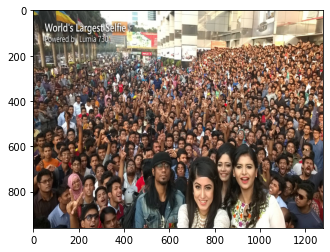

In [7]:
%matplotlib inline
img_file = 'selfie.jpg'
img = cv2.imread(img_file)
img = cv2.resize(img, (inshapes[0][3], inshapes[0][2]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = img.transpose((2,0,1))

In [8]:
res = exenet.infer({inblobs[0]:img})

* landmarks


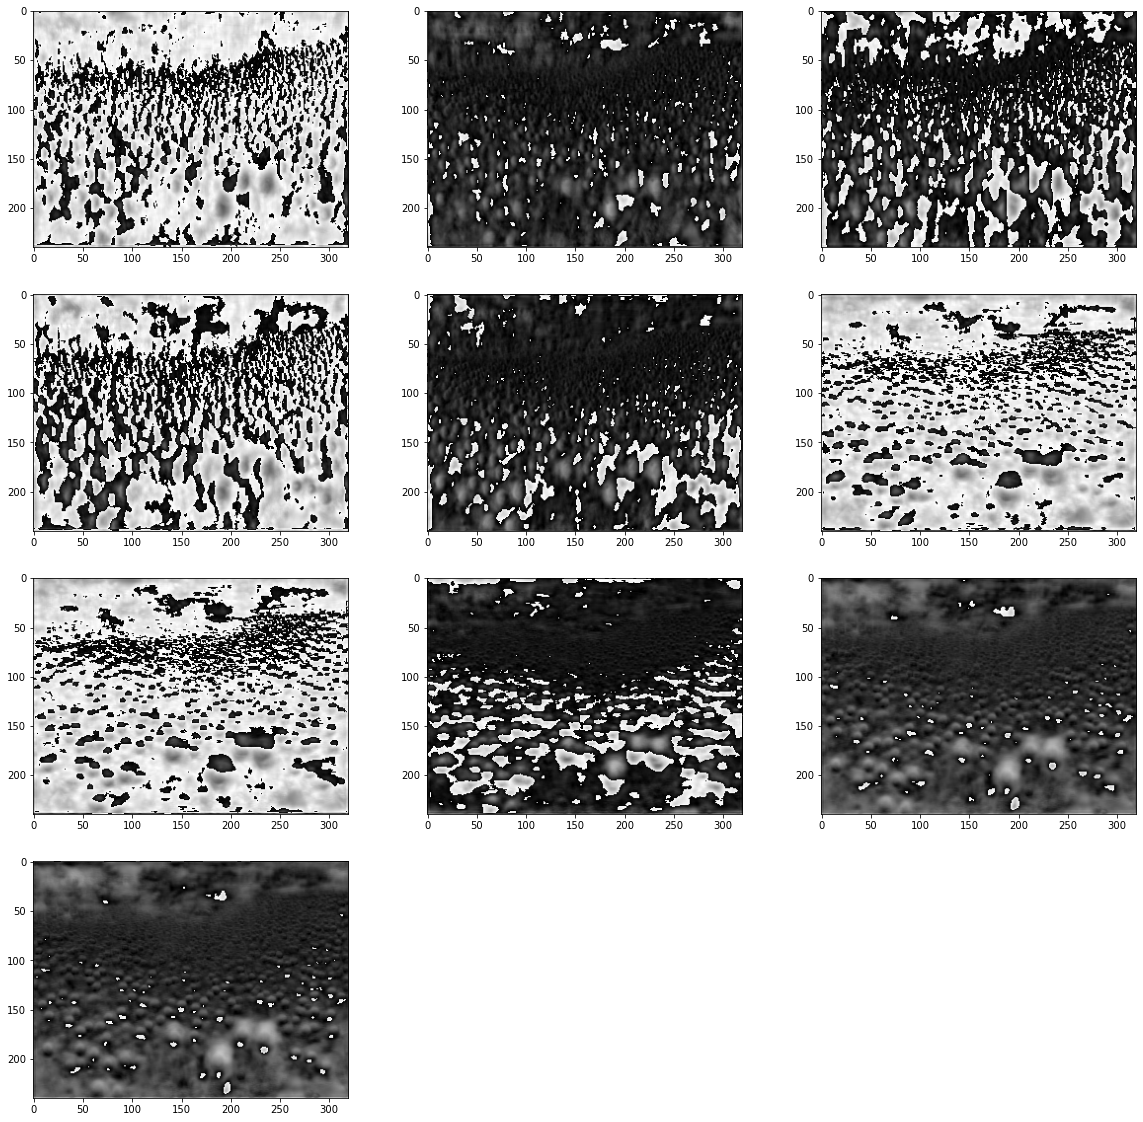

In [9]:
%matplotlib inline
idx = 0
n=1
plt.figure(figsize=(20,20))
print('* landmarks')
for ch in range(outshapes[idx][1]):
    a = res[outblobs[idx]][:,ch,:,:]
    a = (a*255).astype(np.uint8).reshape(outshapes[idx][2], outshapes[idx][3] ,1)
    plt.subplot(4,3, n)
    plt.imshow(cv2.merge([a,a,a]), cmap='gray')
    n+=1


* boxes (x,y,r,b)


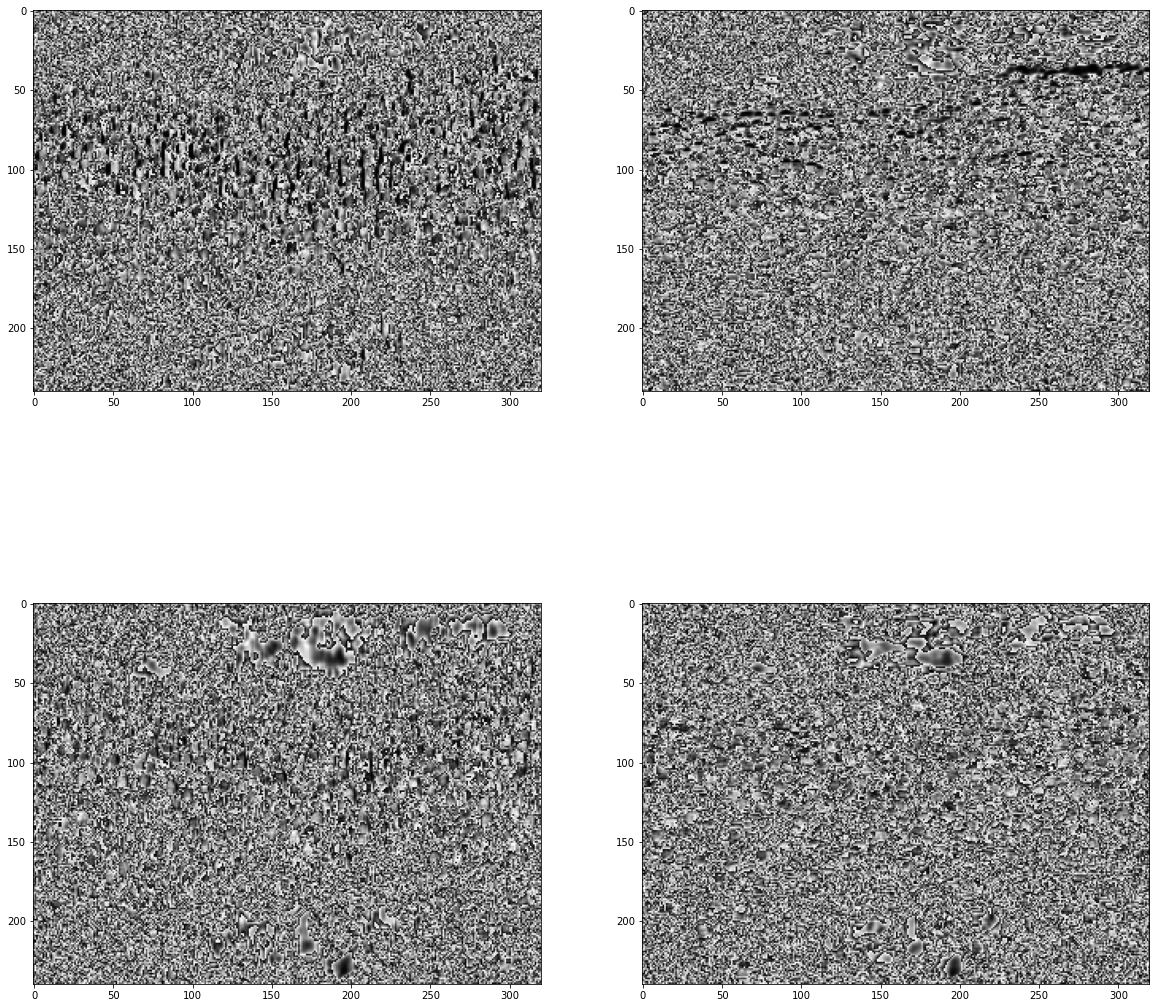

In [10]:
%matplotlib inline
idx = 1
n=1
plt.figure(figsize=(20,20))
print('* boxes (x,y,r,b)')
for ch in range(outshapes[idx][1]):
    a = res[outblobs[idx]][:,ch,:,:]
    a = (a*255).astype(np.uint8).reshape(outshapes[idx][2], outshapes[idx][3] ,1)
    plt.subplot(2,2, n)
    plt.imshow(cv2.merge([a,a,a]), cmap='gray')
    n+=1

* heatmap


True

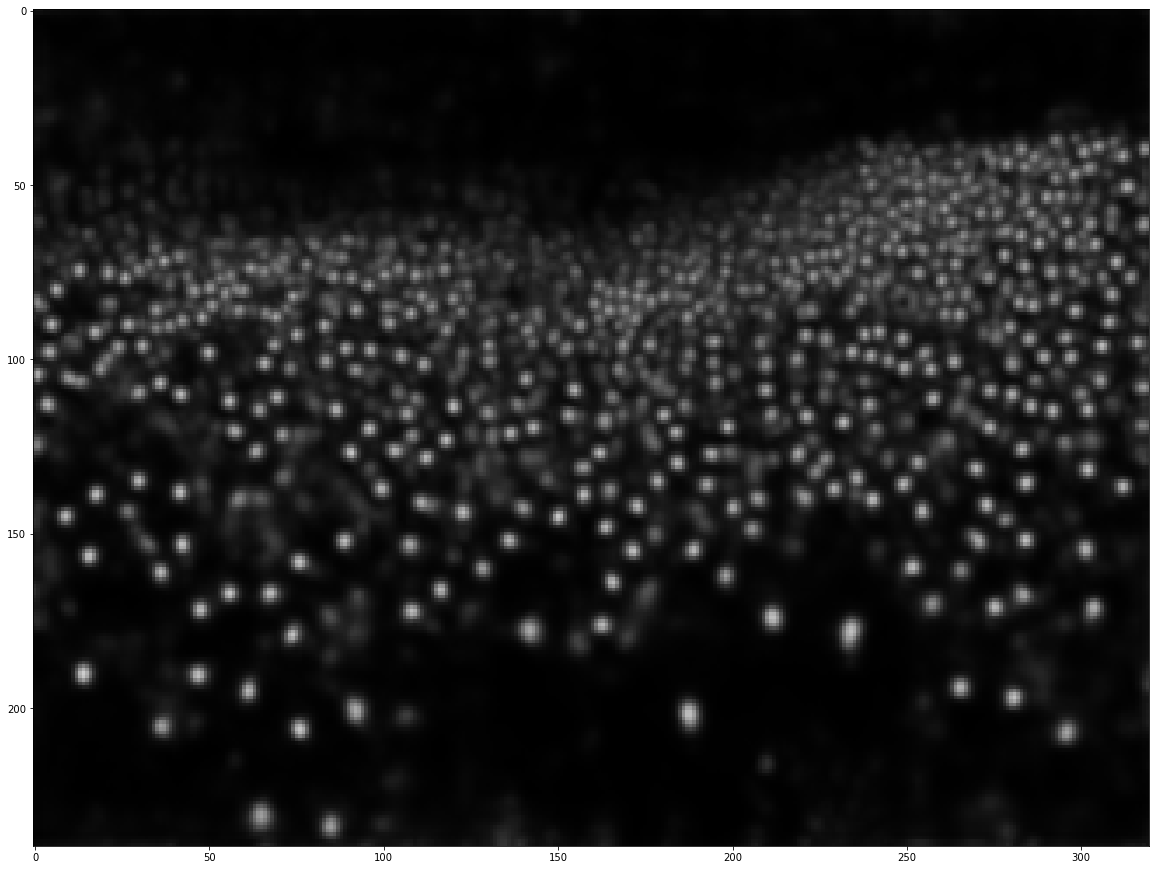

In [11]:
%matplotlib inline
idx = 2
n=1
plt.figure(figsize=(20,20))
print('* heatmap')
for ch in range(outshapes[idx][1]):
    a = res[outblobs[idx]][:,ch,:,:]
    a = (a*255).astype(np.uint8).reshape(outshapes[idx][2], outshapes[idx][3] ,1)
    plt.subplot(1,1, n)
    plt.imshow(cv2.merge([a,a,a]), cmap='gray')
    n+=1